In [1]:
#importing all required python libraries
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt #use to visualize dataset values
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
c:\users\subbu\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\subbu\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\subbu\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
#loading and displaying loans dataset
dataset = pd.read_csv("Dataset/startup_data.csv")
dataset

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


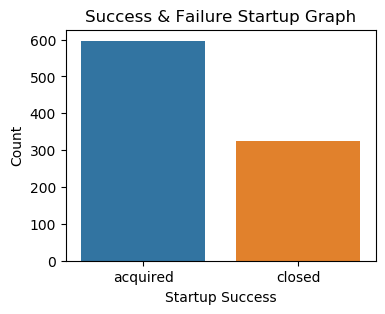

In [3]:
#visualizing number of defaulter and non-defaulter
data = dataset.groupby(["status"]).size().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(4, 3))
sns.barplot(x = 'status', y = 'Count', data = data)
plt.title("Success & Failure Startup Graph")
plt.xlabel("Startup Success")
plt.ylabel("Count")
plt.show()

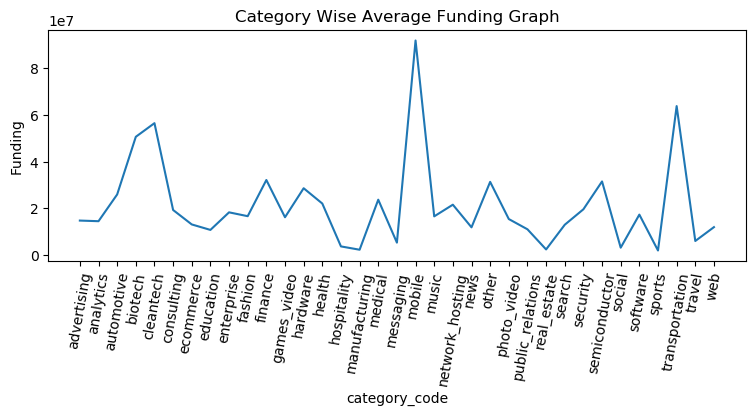

In [4]:
#visualizing average funding invested in different categories companies
plt.figure(figsize=(9, 3))
data = dataset.groupby(["category_code"])['funding_total_usd'].mean().sort_values(ascending=False).reset_index(name='Funding')
sns.lineplot(data=data, x='category_code', y='Funding')
plt.title("Category Wise Average Funding Graph")
plt.xticks(rotation=80)
plt.show()

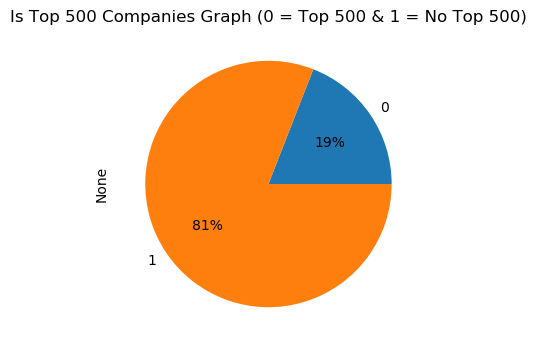

In [5]:
#visualizing number of startup in 500
dataset.groupby("is_top500").size().plot.pie(autopct='%.0f%%', figsize=(5, 4))
plt.title("Is Top 500 Companies Graph (0 = Top 500 & 1 = No Top 500)")
plt.show()

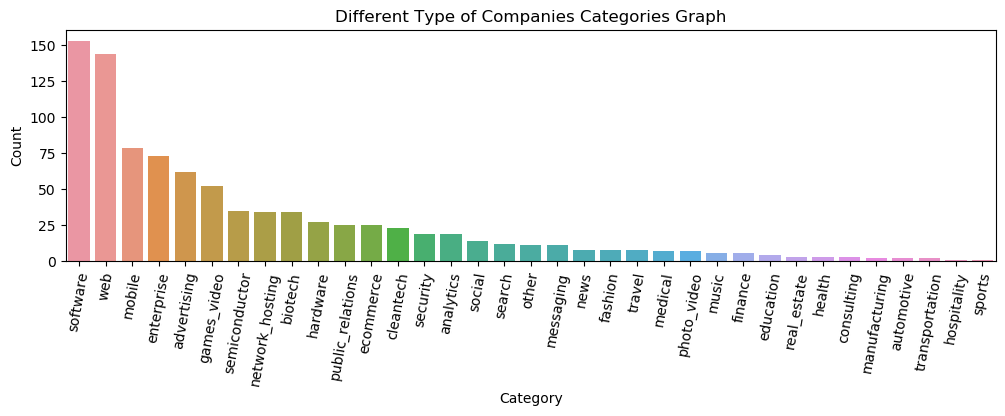

In [6]:
#visualizing number of defaulter and non-defaulter
data = dataset.groupby(["category_code"]).size().sort_values(ascending=False).reset_index(name='Count')
plt.figure(figsize=(12, 3))
sns.barplot(x = 'category_code', y = 'Count', data = data)
plt.title("Different Type of Companies Categories Graph")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=80)
plt.show()

In [7]:
#extracting relevant features from dataset
data = dataset[['relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants', 'status']]
#finding and displaying count of missing or null values
print("Count of missing values in selected features")
data.isnull().sum()

Count of missing values in selected features


relationships        0
funding_rounds       0
funding_total_usd    0
milestones           0
avg_participants     0
status               0
dtype: int64

In [8]:
#applying label encoder to convert non-numeric data to numeric data and then normalizing extracted training features
labels = ['Acquired', 'Closed']
le = LabelEncoder()
data['status'] = pd.Series(le.fit_transform(data['status'].astype(str)))#encode all str columns to numeric
Y = data['status']
X = data.values[:,0:data.shape[1]-1]
#normalizing training features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Normalized & Processed Features = "+str(X))

Normalized & Processed Features = [[-0.648696    0.49566485 -0.13214022  0.87613768 -0.98131975]
 [ 0.17754099  1.21500235  0.07745542 -0.6368185   1.02019053]
 [-0.37328367 -0.94301016 -0.12040076  0.11965959  0.61988848]
 ...
 [-0.37328367 -0.94301016  0.09803247 -0.6368185   2.75483278]
 [ 0.59065949 -0.22367266 -0.05233823  0.11965959 -0.98131975]
 [-0.51098983 -0.94301016 -0.02859549 -0.6368185   0.0861524 ]]


In [9]:
#applying ADASYN to handle imbalance issue
print("Dataset Size Before Imbalance Handling = "+str(X.shape[0]))
X_resampled, y_resampled = ADASYN().fit_sample(X, Y)
print("Dataset Size After Imbalance Handling using ADASYN = "+str(X_resampled.shape[0]))

Dataset Size Before Imbalance Handling = 923
Dataset Size After Imbalance Handling using ADASYN = 1172


In [10]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
print("Train & Test Dataset Split")
print("80% records used to train algorithms : "+str(X_train.shape[0]))
print("20% records features used to test algorithms : "+str(X_test.shape[0]))
data = np.load("model/data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = data

Train & Test Dataset Split
80% records used to train algorithms : 937
20% records features used to test algorithms : 235


In [11]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [12]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 3))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()  

Random Forest Accuracy  : 95.31914893617022
Random Forest Precision : 95.8820443645084
Random Forest Recall    : 94.85347985347985
Random Forest FSCORE    : 95.2190719266123


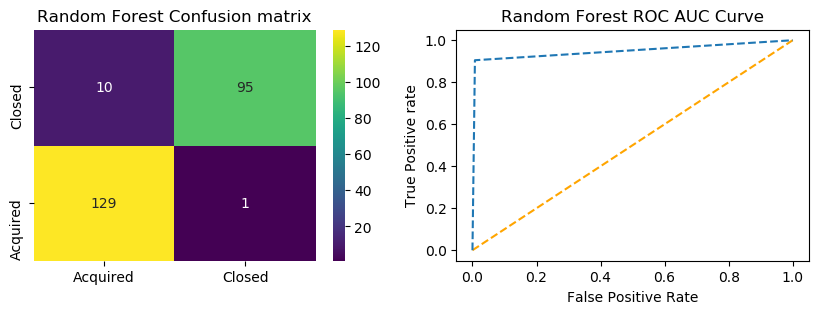

In [13]:
#train Random Forest algorithm on 80% training features and then utilize 20% test data for prediction
#applying tune parameeters
rf_cls = RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
rf_cls.fit(X_train, y_train)
#perform prediction on test data
predict = rf_cls.predict(X_test)
#call this to calculate accuracy and other metrics 
calculateMetrics("Random Forest", y_test, predict)

Logistic Regression Accuracy  : 64.25531914893618
Logistic Regression Precision : 64.65454545454546
Logistic Regression Recall    : 64.76190476190476
Logistic Regression FSCORE    : 64.23913043478261


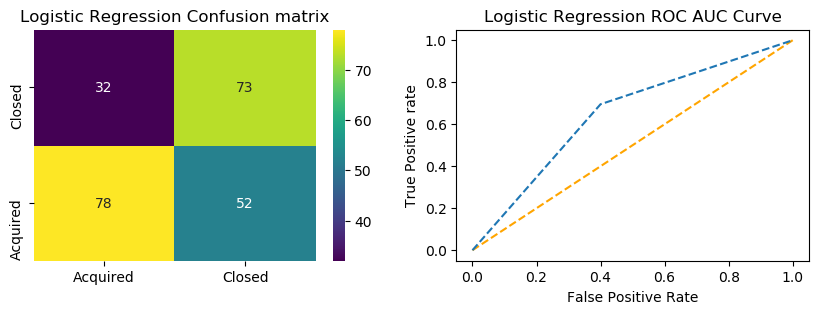

In [14]:
#train LogisticRegression algorithm on 80% training features and then utilize 20% test data for prediction
lr_cls = LogisticRegression()
lr_cls.fit(X_train, y_train)
#perform prediction on test data
predict = lr_cls.predict(X_test)
#call this to calculate accuracy and other metrics 
calculateMetrics("Logistic Regression", y_test, predict)

SVM Accuracy  : 69.7872340425532
SVM Precision : 69.72254419008983
SVM Recall    : 69.94505494505493
SVM FSCORE    : 69.6796234712606


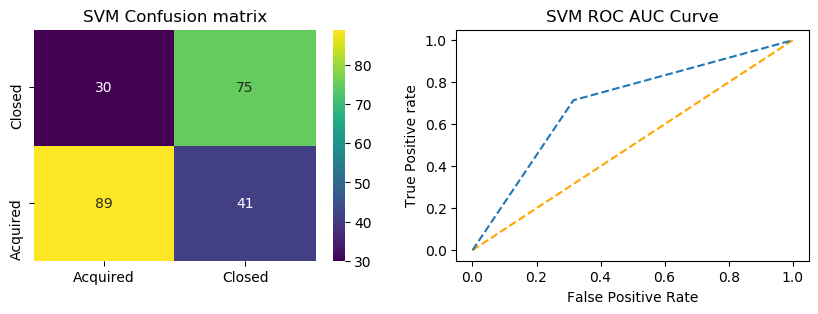

In [15]:
#train SVM algorithm on 80% training features and then utilize 20% test data for prediction
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
#perform prediction on test data
predict = svm_cls.predict(X_test)
#call this to calculate accuracy and other metrics 
calculateMetrics("SVM", y_test, predict)

Naive Bayes Accuracy  : 54.8936170212766
Naive Bayes Precision : 71.30779848171153
Naive Bayes Recall    : 59.04761904761905
Naive Bayes FSCORE    : 49.46851671535216


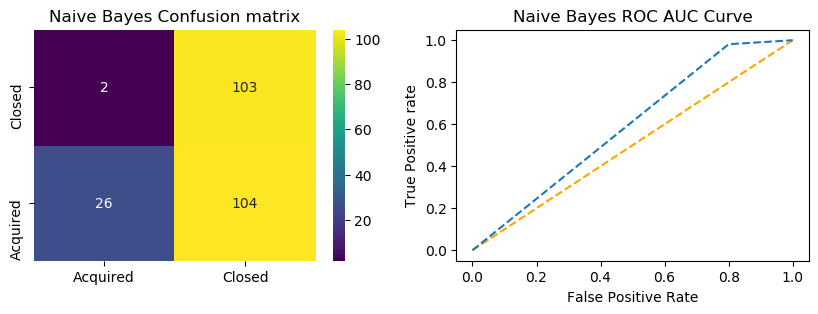

In [16]:
#train Naive Bayes algorithm on 80% training features and then utilize 20% test data for prediction
nb_cls = GaussianNB()
nb_cls.fit(X_train, y_train)
#perform prediction on test data
predict = nb_cls.predict(X_test)
#call this to calculate accuracy and other metrics 
calculateMetrics("Naive Bayes", y_test, predict)

KNN Accuracy  : 81.70212765957446
KNN Precision : 81.95270564340635
KNN Recall    : 82.27106227106226
KNN FSCORE    : 81.68089773571907


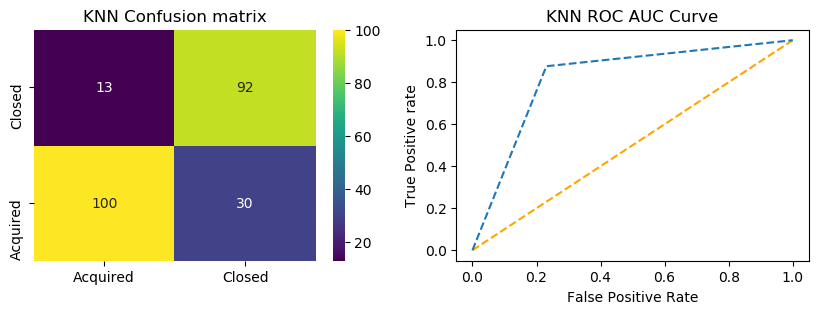

In [17]:
#train KNN algorithm on 80% training features and then utilize 20% test data for prediction
knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train, y_train)
#perform prediction on test data
predict = knn_cls.predict(X_test)
#call this to calculate accuracy and other metrics 
calculateMetrics("KNN", y_test, predict)

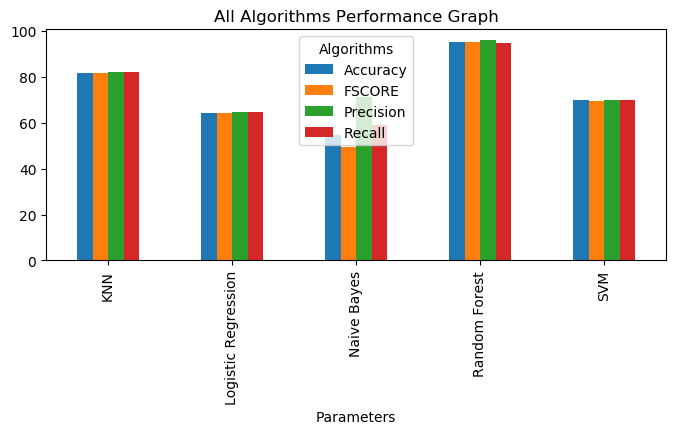

In [18]:
#plot all algorithm performance in tabukar format
df = pd.DataFrame([['Random Forest','Accuracy',accuracy[0]],['Random Forest','Precision',precision[0]],['Random Forest','Recall',recall[0]],['Random Forest','FSCORE',fscore[0]],
                   ['Logistic Regression','Accuracy',accuracy[1]],['Logistic Regression','Precision',precision[1]],['Logistic Regression','Recall',recall[1]],['Logistic Regression','FSCORE',fscore[1]],
                   ['SVM','Accuracy',accuracy[2]],['SVM','Precision',precision[2]],['SVM','Recall',recall[2]],['SVM','FSCORE',fscore[2]],
                   ['Naive Bayes','Accuracy',accuracy[3]],['Naive Bayes','Precision',precision[3]],['Naive Bayes','Recall',recall[3]],['Naive Bayes','FSCORE',fscore[3]],
                   ['KNN','Accuracy',accuracy[4]],['KNN','Precision',precision[4]],['KNN','Recall',recall[4]],['KNN','FSCORE',fscore[4]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(8, 3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [19]:
#display all algorithm performnace
algorithms = ['Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', 'KNN']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Random Forest,95.319149,95.882044,94.853480,95.219072
1,Logistic Regression,64.255319,64.654545,64.761905,64.239130
2,SVM,69.787234,69.722544,69.945055,69.679623
3,Naive Bayes,54.893617,71.307798,59.047619,49.468517
4,KNN,81.702128,81.952706,82.271062,81.680898
